 ## LaTeX {bmatrix}

**Polynomial interpolation example**

With n+1 points $(x_0, y_0), (x_1, y_1), \dots, (x_n, y_n), (x_{n+1}, y_{n+1})$, there is a uniqie polynomial of degree $n$ that passes through all the points.

To do this consider all of the equations that result from plugging in the points into the polynomial we are searching for.

The following is the resulting matrix equation

$$
\begin{bmatrix}
1 & x_0 & x_0^2 & \cdots & x_0^n \\
1 & x_1 & x_1^2 & \cdots & x_1^n \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_n & x_n^2 & \dots & x_n^n
\end{bmatrix}

\begin{bmatrix}
a_0\\
a_1\\
\vdots\\
a_n
\end{bmatrix}

=

\begin{bmatrix}
y_0\\
y_1\\
\vdots\\
y_n
\end{bmatrix}
$$

Then the coefficients are given by

$$

inverse vandermonde matrix \times y = \textbf{a} 

$$

So we can use 

```latex
\begin{bmatrix}
1 & x_0 & x_0^2 & \cdots & x_0^n \\
1 & x_1 & x_1^2 & \cdots & x_1^n \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_n & x_n^2 & \dots & x_n^n
\end{bmatrix}

\begin{bmatrix}
a_0\\
a_1\\
\vdots\\
a_n
\end{bmatrix}

=

\begin{bmatrix}
y_0\\
y_1\\
\vdots\\
y_n
\end{bmatrix}
```

Like for the first point

$$
a_0 + a_1x_0 + a_2x_0^2 + \cdots + a_nx_0^n = y_0 \\
$$

In [2]:
import matplotlib.pyplot as plt

import numpy as np

import scipy as sp

# Group assignments

## Problem 1

**a)** Write a function that solves a system *Ax = b* by computing the inverse of *A* and multiplying by it on the left.

In [12]:
solve = lambda A, b: np.matmul(np.linalg.inv(A), b)


**a)** Write a function that takes in a list of points and returns the matrix on the far left in above equations.


In [15]:
def vandermonde(X, n):
    M = []
    for pt in X:
        M.append([pt[0]**i for i in range(n)])

    return np.matrix(M), np.array([x[1] for x in X])


**b)** Use your functions to find the coefficients of the polynomial that passes through the points $(0, 1), (1, -3), (2, 34), (3, -8)$.


In [16]:
pts = np.array([
                [0,0],
                [1,2],
                [2,-1],
                [3,1]
])

M, y = vandermonde(pts, 4)

# M.shape, y.shape
solve = lambda A, b: np.matmul(np.linalg.inv(A), b)
a = solve(M, y.T)[0,:]

a

matrix([[ 0.        ,  7.83333333, -7.5       ,  1.66666667]])

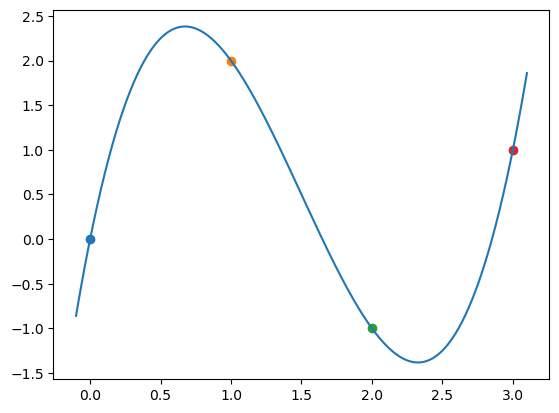

In [17]:
cubic = lambda x: a[0,0] + a[0,1]*x + a[0,2]*x**2 + a[0,3]*x**3

for pt in pts:
    plt.scatter(*pt)

xs = np.linspace(-0.1,3.1, 1000)
plt.plot(xs, cubic(xs))


**c)** Plot the resulting polynomial and points.

```latex
\left[\begin{array}{cc}
0.5 & 0.3 & 0\\
0.3 & 0.3 & 0.4\\
0.2 & 0.4 & 0.6 \\
\end{array}\right]
```

## Problem 2

**a)** Find the eigenvalues and eigenvectors of the above matrix

In [8]:
eig = np.linalg.eig(
    
    np.matrix([
        
                    [0.5,     0.3,      0],
                    [0.3,     0.3,      0.4],
                    [0.2,     0.4,      0.6]

    ])

)

eig


(array([ 1.        ,  0.44494897, -0.04494897]),
 matrix([[-0.343559  , -0.76688827,  0.44872717],
         [-0.57259833,  0.14072662, -0.81511137],
         [-0.74437783,  0.62616165,  0.3663842 ]]))

**b)** Find the multiplicities of the eigenvalues


In [9]:
v1, v2, v3 = eig[0][0], eig[0][1], eig[0][2]

v1, v2, v3

(0.9999999999999997, 0.44494897427831803, -0.04494897427831783)

each multiplicity 1.

**c)** Diagonalize the matrix

## Problem 3

**Find eigen values of $100\times 100$ random sparse matrix with density $\delta = 0.07$ with only real part.**

In [60]:
n = 100
delta = 0.01

M = np.matrix(sp.sparse.random(n, n, density=delta).todense())

eig = np.linalg.eig(M)

# print(len(eig[0]), eig[1])

eig


(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.20

In [42]:
import torch

matrix([[ 0.38539007,  0.48051786, -0.23810603, ...,  1.3243284 ,
         -0.3139668 ,  0.27825138],
        [ 0.04854377,  1.2520638 , -0.3232999 , ..., -0.30267143,
         -1.7946745 ,  0.31474864],
        [-0.6328586 , -0.31504244, -1.9212642 , ...,  0.4511366 ,
         -0.29971704,  0.7211655 ],
        ...,
        [-2.1651495 ,  0.5135541 , -0.58034873, ..., -0.07275424,
          0.83004785,  0.18806699],
        [ 0.58192694,  0.6041867 ,  0.29024678, ..., -0.32531783,
         -1.114467  ,  0.26784477],
        [ 0.9041132 ,  0.5268954 ,  0.49515083, ...,  0.5409978 ,
          0.73956305, -1.0598836 ]], dtype=float32)

In [62]:
M = np.matrix(torch.randn(n,n))
eig = np.linalg.eig(M)

# print(len(eig[0]), eig[1])

eig


(array([-10.8032255 +0.j        ,  -8.7065325 +5.582551j  ,
         -8.7065325 -5.582551j  ,  10.552449  +0.j        ,
          9.392356  +3.034623j  ,   9.392356  -3.034623j  ,
          9.442246  +0.j        ,   8.36862   +4.2403092j ,
          8.36862   -4.2403092j ,  -7.7953734 +4.936213j  ,
         -7.7953734 -4.936213j  ,  -9.022195  +0.j        ,
         -8.158013  +4.191192j  ,  -8.158013  -4.191192j  ,
          7.2007275 +5.2820168j ,   7.2007275 -5.2820168j ,
         -1.1946042 +9.163854j  ,  -1.1946042 -9.163854j  ,
          1.4029789 +8.981472j  ,   1.4029789 -8.981472j  ,
          4.5799103 +7.3520975j ,   4.5799103 -7.3520975j ,
         -4.031423  +7.6139946j ,  -4.031423  -7.6139946j ,
          7.801221  +1.3005162j ,   7.801221  -1.3005162j ,
          3.76578   +7.4900484j ,   3.76578   -7.4900484j ,
          0.25799686+8.6198845j ,   0.25799686-8.6198845j ,
         -7.7416954 +2.169975j  ,  -7.7416954 -2.169975j  ,
          5.7267222 +5.697587j  ,   5.72